<a href="https://colab.research.google.com/github/term1830/DS-Unit-1-Sprint-2-Statistics/blob/master/main_project_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Keith Terman build week 1
# website address if csv files below dont work
# https://data.austintexas.gov/Health-and-Community-Services/Food-Establishment-Inspection-Scores/ecmv-9xxi
# https://data.world/niccolley/us-zipcode-to-county-state

In [ ]:
!pip install plotly-geo
!pip install pyshp
!pip install geopandas
!sudo pip install chart_studio

import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import chart_studio
import chart_studio.plotly as py

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go


     |████████████████████████████████| 23.7MB 1.4MB/s 
     |████████████████████████████████| 225kB 2.8MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=c24e4a2bc5d172442108ac4d9d31cc61cfc66bfb8bb6ccdc7bc65ee1257a2333
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
     |████████████████████████████████| 962kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 318kB/s 
     |████████████████████████████████| 10.9MB 42.5MB/s 
     |████████████████████████████████| 71kB 2.2MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**Setting up dataframes and doing basic data cleaning including removing
nan/empty values and getting rid of unncessary info (address had some 
extra characters that werent needed**

In [ ]:
#dfx is inspection scores 
#zipfip is dataframe to get fip codes and zip codes to put them into dfx 
#dataframe in order to plot them properly

dfx = pd.read_csv('https://raw.githubusercontent.com/term1830/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/Food_Establishment_Inspection_Scores.csv')
zipfip = pd.read_csv('https://raw.githubusercontent.com/term1830/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/ZIP-COUNTY-FIPS_2012-03.csv')

print (dfx.shape)
dfx.head(5)

(25243, 7)


,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,RW - The Finishline Carwash,NaN,08/18/2017,92,NaN,10555469,Routine Inspection
1,Third Base,78748.0,06/28/2017,94,"9600 S IH\nAUSTIN, TX 78748",10287518,Routine Inspection
2,"Wanna Play, LLC",78613.0,07/20/2017,100,"14010 N US 183 HWY\nAUSTIN, TX 78613",10103530,Routine Inspection
3,Cover 2,78729.0,07/23/2019,84,"13701 N US 183 HWY\nAUSTIN, TX 78729",10718846,Routine Inspection
4,Hideaway Kitchen & Bar,78744.0,09/21/2018,85,"4323 S IH\nAUSTIN, TX 78744",11903200,Routine Inspection


In [ ]:
# Getting rid of the \n that is in the address field of many addresses

dfx.Address = dfx.Address.replace('\n',' ',regex = True)

In [ ]:
dfx.tail(5)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
25238,Harmony School of Innovation - Austin,78744.0,10/16/2017,96,"2124 E ST ELMO RD AUSTIN, TX 78744 (30.209403,...",11222208,Routine Inspection
25239,Manna Korean Restaurant,78752.0,03/08/2019,74,"6808 N LAMAR BLVD AUSTIN, TX 78752 (30.335837,...",10657014,Routine Inspection
25240,Flightpath Coffeehouse,78751.0,11/26/2018,91,"5011 DUVAL ST AUSTIN, TX 78751 (30.313985, -97...",2801741,Routine Inspection
25241,"Village at the Triangle, The",78751.0,11/08/2019,98,"4517 TRIANGLE AVE AUSTIN, TX 78751 (30.313567,...",12186178,Routine Inspection
25242,WL - Eanes Elementary,78746.0,04/23/2018,100,"4101 BEE CAVES RD WEST LAKE HILLS, TX 78746 (3...",10002740,Routine Inspection


In [ ]:
# Getting rid of the latitude/longitude that is in many of the addresses
dfx.Address = dfx.Address.replace('\(.*',' ',regex = True)

In [ ]:
dfx.tail()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
25238,Harmony School of Innovation - Austin,78744.0,10/16/2017,96,"2124 E ST ELMO RD AUSTIN, TX 78744",11222208,Routine Inspection
25239,Manna Korean Restaurant,78752.0,03/08/2019,74,"6808 N LAMAR BLVD AUSTIN, TX 78752",10657014,Routine Inspection
25240,Flightpath Coffeehouse,78751.0,11/26/2018,91,"5011 DUVAL ST AUSTIN, TX 78751",2801741,Routine Inspection
25241,"Village at the Triangle, The",78751.0,11/08/2019,98,"4517 TRIANGLE AVE AUSTIN, TX 78751",12186178,Routine Inspection
25242,WL - Eanes Elementary,78746.0,04/23/2018,100,"4101 BEE CAVES RD WEST LAKE HILLS, TX 78746",10002740,Routine Inspection


**Setting up plotly in cell for colab, cleaning up df's a little
for plots**

In [ ]:
def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

In [ ]:
#dropping nan values and making zip code into an int to get rid of the .0 at the end of zip codes

df = dfx.dropna()
df['Zip Code'] = df['Zip Code'].astype('int32')
print(df.shape)
print(df['Zip Code'].nunique())

df.head()

(25235, 7)
57


,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
1,Third Base,78748,06/28/2017,94,"9600 S IH AUSTIN, TX 78748",10287518,Routine Inspection
2,"Wanna Play, LLC",78613,07/20/2017,100,"14010 N US 183 HWY AUSTIN, TX 78613",10103530,Routine Inspection
3,Cover 2,78729,07/23/2019,84,"13701 N US 183 HWY AUSTIN, TX 78729",10718846,Routine Inspection
4,Hideaway Kitchen & Bar,78744,09/21/2018,85,"4323 S IH AUSTIN, TX 78744",11903200,Routine Inspection
5,Riverside Grocery,78701,06/28/2017,88,"30 N IH AUSTIN, TX 78701",2803648,Routine Inspection


In [ ]:
# creating new df with zip codes and score 

zipcodes = df.groupby('Zip Code').Score.mean().reset_index()

print (zipcodes.shape)
zipcodes.head(3)

(57, 2)


,Zip Code,Score
0,78610,92.800000
1,78612,88.000000
2,78613,92.211982


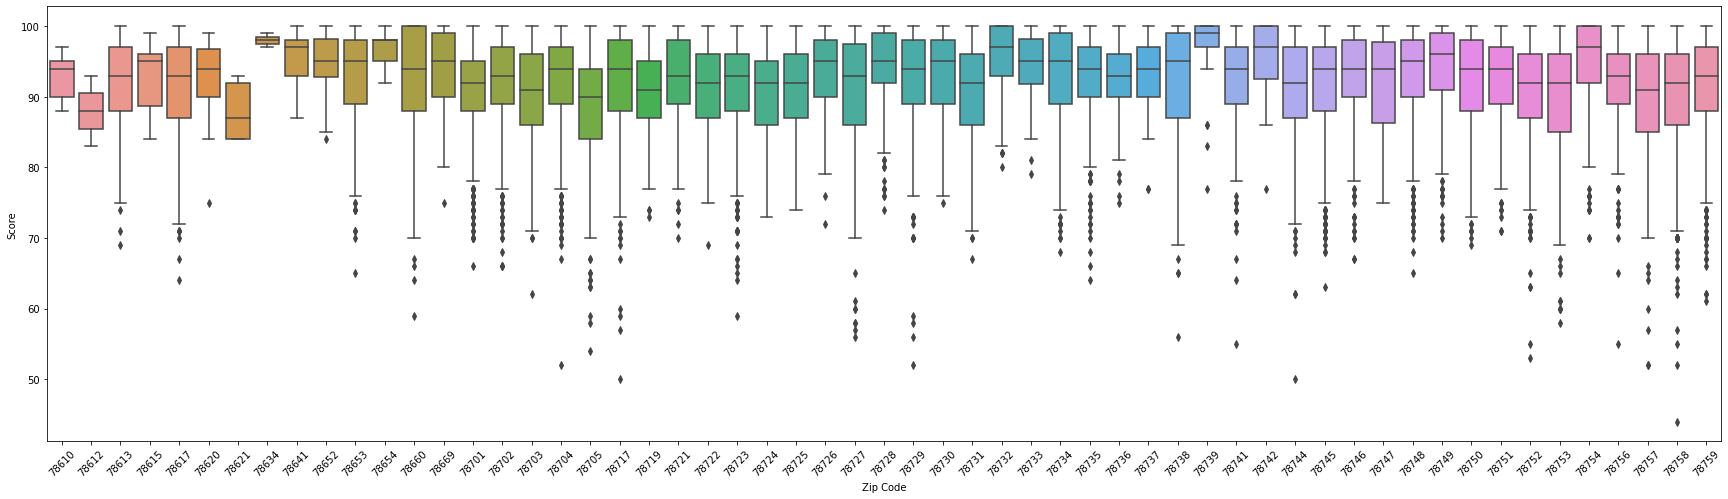

In [ ]:
#boxplot to visiualize zip codes and their scores

plt.figure(figsize=(30,8))
sns.boxplot( x=df["Zip Code"], y=df["Score"],fliersize=5,)
sns.set(rc={'figure.figsize':(15,15)})
plt.xticks(rotation=45)
plt.show();

**Looking at routine vs followup scores and setting up a histogram to look at the overall ratings of the inspection scores**


In [ ]:
#separating scores that are routine inspections vs scores that are followup inspections

df['Process Description'].unique()

routine = df[df['Process Description'] == 'Routine Inspection']

followup = df[df['Process Description'] == 'Follow-Up Inspection']

In [ ]:
# comparing routine and followup scores with a ttest

from scipy.stats import ttest_ind

xx, comparison = ttest_ind(routine.Score,followup.Score)

print (comparison)

2.476907528246005e-12


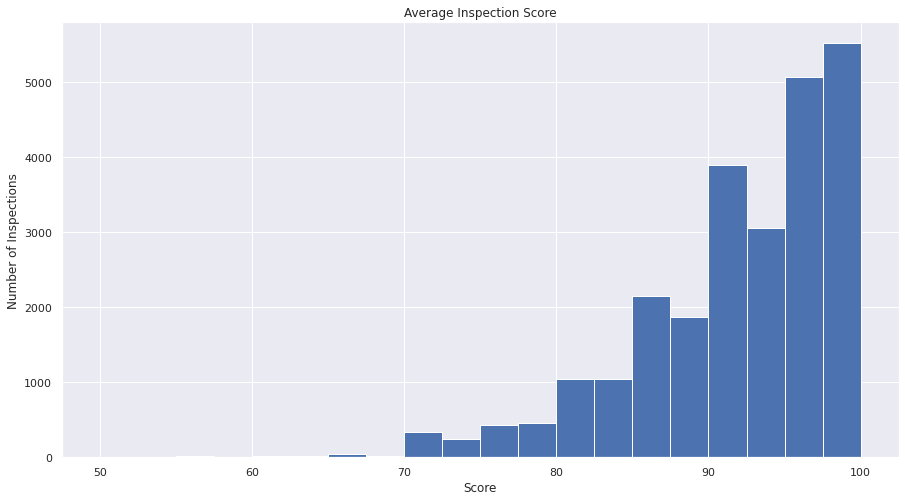

In [ ]:
#histogram showing overall average of the inspection scores

a = df.Score
plt.figure(figsize=(15,8))
plt.hist(a, range=(50, 100), bins=20, alpha=1,)
plt.xlabel('Score')
plt.ylabel("Number of Inspections")
plt.title('Average Inspection Score')
plt.show();


In [ ]:
zipfip.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36008,Autauga County,AL,1001,H1
3,36022,Autauga County,AL,1001,H1
4,36051,Autauga County,AL,1001,H1


**Combining the zip code/inspection score dataframes to get the zipcodes associated with their county code and creating a plotly map based on county code and averarge inspection score** 

In [ ]:
#merging the zipfip for the fips portion into the inspection dataframe

df_final = pd.merge(df,zipfip,left_on='Zip Code',right_on='ZIP',how='left')

In [ ]:
#deleting the extra zip column 

del df_final['ZIP'],df_final['CLASSFP']

In [ ]:
df_final.head()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,COUNTYNAME,STATE,STCOUNTYFP
0,Third Base,78748,06/28/2017,94,"9600 S IH AUSTIN, TX 78748",10287518,Routine Inspection,Travis County,TX,48453
1,"Wanna Play, LLC",78613,07/20/2017,100,"14010 N US 183 HWY AUSTIN, TX 78613",10103530,Routine Inspection,Travis County,TX,48453
2,"Wanna Play, LLC",78613,07/20/2017,100,"14010 N US 183 HWY AUSTIN, TX 78613",10103530,Routine Inspection,Williamson County,TX,48491
3,Cover 2,78729,07/23/2019,84,"13701 N US 183 HWY AUSTIN, TX 78729",10718846,Routine Inspection,Travis County,TX,48453
4,Cover 2,78729,07/23/2019,84,"13701 N US 183 HWY AUSTIN, TX 78729",10718846,Routine Inspection,Williamson County,TX,48491


In [ ]:
#creating new dataframe with mean scores linked to the fip's (zip code)

fipscore = df_final.groupby('STCOUNTYFP').Score.mean().reset_index()
fipscore.head(3)

,STCOUNTYFP,Score
0,48021,92.152381
1,48031,93.589041
2,48053,93.939850


In [ ]:
# plotly.offline.init_notebook_mode(connected=True)

In [ ]:
enable_plotly_in_cell()
fig = ff.create_choropleth(fips=fipscore['STCOUNTYFP'], values=fipscore
                           ['Score'], scope=['Texas'],state_outline={'color': 'rgb(15, 15, 55)', 'width': 3}, asp=2.9, title='Restaurant Inspection Score by County',
    legend_title='Inspection Score'
 
     )

fig.show()

**Adding some time features to the dataframe to plot out whether or not there is any score rating correlated to the month**

In [ ]:
#creating month/year columns and changing the date to date time category

df_final['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df_final['Year']=df_final['Inspection Date'].dt.year 
df_final['Month']=df_final['Inspection Date'].dt.month 
df_final = df_final.dropna()
df_final.head()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,COUNTYNAME,STATE,STCOUNTYFP,Year,Month
1,"Wanna Play, LLC",78613,2017-06-28,100,"14010 N US 183 HWY AUSTIN, TX 78613",10103530,Routine Inspection,Travis County,TX,48453,2017.0,6.0
2,"Wanna Play, LLC",78613,2017-07-20,100,"14010 N US 183 HWY AUSTIN, TX 78613",10103530,Routine Inspection,Williamson County,TX,48491,2017.0,7.0
3,Cover 2,78729,2019-07-23,84,"13701 N US 183 HWY AUSTIN, TX 78729",10718846,Routine Inspection,Travis County,TX,48453,2019.0,7.0
4,Cover 2,78729,2018-09-21,84,"13701 N US 183 HWY AUSTIN, TX 78729",10718846,Routine Inspection,Williamson County,TX,48491,2018.0,9.0
5,Hideaway Kitchen & Bar,78744,2017-06-28,85,"4323 S IH AUSTIN, TX 78744",11903200,Routine Inspection,Travis County,TX,48453,2017.0,6.0


In [ ]:
##function to separate scores, month and county
def county_data(county):
  output = df_final[df_final['STCOUNTYFP']==county].groupby(['Month'])['Score'].mean()
  return output

In [ ]:
#plugging in county codes
county = [48453, 48491, 48209, 48021, 48055, 48031, 48053, 48299, 48287]
outputs = list(map(county_data, county))
outputs[0]

Month
1.0     91.920252
2.0     91.596413
3.0     91.557617
4.0     91.717676
5.0     91.762712
6.0     91.745681
7.0     91.767867
8.0     91.440589
9.0     91.879798
10.0    91.932911
11.0    91.733914
12.0    91.698803
Name: Score, dtype: float64

In [ ]:
# creating the plot to show the county codes
#and their overall inspection rating
colors = ['red', 'orange', 'yellow', 'green', 'purple', 'blue']


traces={}
for x in range(0,6):
  traces[x] = go.Scatter(
      x = outputs[x].index,
      y = outputs[x].values,
      mode = 'lines',
      marker = {'color': colors[x]},
      name = county[x]
  )

data = [traces[0], traces[1], traces[2], traces[3], traces[4], traces[5]]
layout = go.Layout(
    title = 'Inspection Score by Month and County'
)


In [ ]:
#line chart showing average inspection scores based on month
enable_plotly_in_cell()
fig = go.Figure(data=data,layout=layout)
fig.show()

In [ ]:
#checking to see if there is any correlation between month of inspection and score

xxx11 = df_final.groupby('Month').Score.mean().reset_index()
xxx11 = xxx11.rename(columns = {"Score":"Inspection Score"})
xxx11.corr()

,Month,Inspection Score
Month,1.000000,0.180675
Inspection Score,0.180675,1.000000


**Looking more into routine inspections vs followup inspections to see if there is any major difference in rating between the two**

In [ ]:
#creating new df to avoid overwriting or errors
df2 = df.copy()
df2

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
1,Third Base,78748,06/28/2017,94,"9600 S IH AUSTIN, TX 78748",10287518,Routine Inspection
2,"Wanna Play, LLC",78613,07/20/2017,100,"14010 N US 183 HWY AUSTIN, TX 78613",10103530,Routine Inspection
3,Cover 2,78729,07/23/2019,84,"13701 N US 183 HWY AUSTIN, TX 78729",10718846,Routine Inspection
4,Hideaway Kitchen & Bar,78744,09/21/2018,85,"4323 S IH AUSTIN, TX 78744",11903200,Routine Inspection
5,Riverside Grocery,78701,06/28/2017,88,"30 N IH AUSTIN, TX 78701",2803648,Routine Inspection
...,...,...,...,...,...,...,...
25238,Harmony School of Innovation - Austin,78744,10/16/2017,96,"2124 E ST ELMO RD AUSTIN, TX 78744",11222208,Routine Inspection
25239,Manna Korean Restaurant,78752,03/08/2019,74,"6808 N LAMAR BLVD AUSTIN, TX 78752",10657014,Routine Inspection
25240,Flightpath Coffeehouse,78751,11/26/2018,91,"5011 DUVAL ST AUSTIN, TX 78751",2801741,Routine Inspection
25241,"Village at the Triangle, The",78751,11/08/2019,98,"4517 TRIANGLE AVE AUSTIN, TX 78751",12186178,Routine Inspection


In [ ]:
#separating followup inspections

df2['Follow-Up'] = df['Process Description'] == 'Follow-Up Inspection'
df2.head()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Follow-Up
1,Third Base,78748,06/28/2017,94,"9600 S IH AUSTIN, TX 78748",10287518,Routine Inspection,False
2,"Wanna Play, LLC",78613,07/20/2017,100,"14010 N US 183 HWY AUSTIN, TX 78613",10103530,Routine Inspection,False
3,Cover 2,78729,07/23/2019,84,"13701 N US 183 HWY AUSTIN, TX 78729",10718846,Routine Inspection,False
4,Hideaway Kitchen & Bar,78744,09/21/2018,85,"4323 S IH AUSTIN, TX 78744",11903200,Routine Inspection,False
5,Riverside Grocery,78701,06/28/2017,88,"30 N IH AUSTIN, TX 78701",2803648,Routine Inspection,False


In [ ]:
df3 = df2[df2['Follow-Up'] == True]

In [ ]:
df3.tail(15)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Follow-Up
22765,Target Store T2288 -Grocery,78748,05/22/2019,100,"9500 S IH AUSTIN, TX 78748",10055908,Follow-Up Inspection,True
22771,"Picnik Burnet, LLC",78756,05/10/2018,92,"4801 BURNET RD AUSTIN, TX 78756",11561992,Follow-Up Inspection,True
23127,Chen's Noodle House,78759,07/11/2018,75,"8650 SPICEWOOD SPRINGS RD AUSTIN, TX 78759",10189519,Follow-Up Inspection,True
23695,Silver Grill Cafe,78727,09/11/2017,90,"4005 W PARMER LN AUSTIN, TX 78727",10465293,Follow-Up Inspection,True
23722,Elmcroft of Austin,78745,06/03/2019,100,"7017 MANCHACA RD AUSTIN, TX 78745",11905686,Follow-Up Inspection,True
23828,Biryani Pot Indian Cuisine,78758,02/04/2019,78,"12407 N MOPAC EXPY AUSTIN, TX 78758",11016302,Follow-Up Inspection,True
23919,Viva Food Mart - Taqueria,78753,08/14/2018,87,"8610 N LAMAR BLVD AUSTIN, TX 78753",11570417,Follow-Up Inspection,True
24105,China Spice,78753,12/16/2019,93,"9710 N LAMAR BLVD AUSTIN, TX 78753",10618280,Follow-Up Inspection,True
24113,La Casita Mexican Restaurant,78757,01/24/2018,82,"1519 W ANDERSON LN AUSTIN, TX 78757",10609544,Follow-Up Inspection,True
24439,Casa Vallarta Restaurant,78744,12/06/2019,72,"6002 BURLESON RD AUSTIN, TX 78744",11241808,Follow-Up Inspection,True


In [ ]:
#taking some results with followup inspections 

f1 = df2[df2['Restaurant Name'] == 'Elizabeth Street Cafe']
f2 = df2[df2['Restaurant Name'] == "Baguette House & Cafe"]
f3 = df2[df2['Restaurant Name'] == "Jimmy John's Gourmet Sandwiches"]
f4 = df2[df2['Restaurant Name'] == "Jimmy John's # 1293"]
f5 = df2[df2['Restaurant Name'] == 'Serranos Cafe & Cantina']
f6 = df2[df2['Restaurant Name'] == "Target Store T2288 -Grocery"]
f7 = df2[df2['Restaurant Name'] == "Picnik Burnet, LLC"]
f8 = df2[df2['Restaurant Name'] == "Silver Grill Cafe"]
f9 = df2[df2['Restaurant Name'] == "Elmcroft of Austin"]
f10 = df2[df2['Restaurant Name'] == "China Spice"]



In [ ]:
#combining the small sample for comparison

frames = [f1, f2, f3,f4,f5,f6,f7,f8,f9,f10]

result = pd.concat(frames)

routinefollow = result.groupby('Process Description').Score.mean().reset_index()
routinefollow


,Process Description,Score
0,Follow-Up Inspection,95.400000
1,Routine Inspection,88.397059


In [ ]:
mycolor='rgb(55,33,77)'
mydata = go.Bar(x = routinefollow['Process Description'],
                y = routinefollow['Score'],
                marker = dict(color=mycolor))

mylayout = go.Layout(title='Inspection Scores',
                     xaxis = dict(),height=500,width=400)

enable_plotly_in_cell()
go.Figure(data=[mydata], layout=mylayout).show()

**New dataframe related to star ratings for our restaurants from above, looking to find out if the star rating and inspection score have any correlation with each other**

In [ ]:
import json

In [ ]:
# if below doesnt work website address = https://www.kaggle.com/yelp-dataset/yelp-dataset?select=yelp_academic_dataset_business.json
# only file needed is  yelp_academic_dataset_business.json

!wget 'https://storage.googleapis.com/kaggle-data-sets/10100%2F1035793%2Fcompressed%2Fyelp_academic_dataset_business.json.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593263934&Signature=p%2BgWo7EcOoBn4NyiyH2Tzb52CfxAoQXEA9fi9DXHmrEef9KDG9pdEwDgc%2Bvuhs2DT2RCIZyduZeQdbZNEGQNyrC4Nx1eJ90e%2FOPCg6btRp%2BaDlnelwh2z9u9CrjNGk8VuVM2MN2sIMlq9LPI6dPrsOI3urycpEwimioGWxKSYsDQsRXbKlvDz2DgSyLpbGg3PTt0NVYuTfpOGq4YJOVsgjcQvQeS8tH8mUS9nEqmvCG%2BbIgusJgYRorYxaoSyjt10DgSxV6NYTIdYlyQDzsC8riGTLvUrAI0lZXLuA%2FKNrC9jQqcS%2FuDpIs4aaxH1iRUxJQCc%2B%2F9pq9ahsj34YqmEA%3D%3D'

The name is too long, 520 chars total.
Trying to shorten...
New name is 10100%2F1035793%2Fcompressed%2Fyelp_academic_dataset_business.json.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593263934&Signature=p+gWo7EcOoBn4NyiyH2Tzb52CfxAoQXEA9fi9DXHmrEef9KDG9pdEwDgc+vuhs2DT2RC.
--2020-06-25 22:20:10--  https://storage.googleapis.com/kaggle-data-sets/10100%2F1035793%2Fcompressed%2Fyelp_academic_dataset_business.json.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593263934&Signature=p%2BgWo7EcOoBn4NyiyH2Tzb52CfxAoQXEA9fi9DXHmrEef9KDG9pdEwDgc%2Bvuhs2DT2RCIZyduZeQdbZNEGQNyrC4Nx1eJ90e%2FOPCg6btRp%2BaDlnelwh2z9u9CrjNGk8VuVM2MN2sIMlq9LPI6dPrsOI3urycpEwimioGWxKSYsDQsRXbKlvDz2DgSyLpbGg3PTt0NVYuTfpOGq4YJOVsgjcQvQeS8tH8mUS9nEqmvCG%2BbIgusJgYRorYxaoSyjt10DgSxV6NYTIdYlyQDzsC8riGTLvUrAI0lZXLuA%2FKNrC9jQqcS%2FuDpIs4aaxH1iRUxJQCc%2B%2F9pq9ahsj34YqmEA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 2607

In [ ]:
!unzip '/content/10100%2F1035793%2Fcompressed%2Fyelp_academic_dataset_business.json.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593263934&Signature=p+gWo7EcOoBn4NyiyH2Tzb52CfxAoQXEA9fi9DXHmrEef9KDG9pdEwDgc+vuhs2DT2RC'

Archive:  /content/10100%2F1035793%2Fcompressed%2Fyelp_academic_dataset_business.json.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593263934&Signature=p+gWo7EcOoBn4NyiyH2Tzb52CfxAoQXEA9fi9DXHmrEef9KDG9pdEwDgc+vuhs2DT2RC
  inflating: yelp_academic_dataset_business.json  


In [ ]:
reviews = pd.read_json('/content/yelp_academic_dataset_business.json',lines=True)

In [ ]:
reviews.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [ ]:
#merging the star ratings with the dataframe with inspection scores

final = pd.merge(df_final,reviews,left_on='Restaurant Name',right_on='name',how='left')

In [ ]:
final.head(2)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,COUNTYNAME,STATE,STCOUNTYFP,Year,Month,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,"Wanna Play, LLC",78613,2017-06-28,100,"14010 N US 183 HWY AUSTIN, TX 78613",10103530,Routine Inspection,Travis County,TX,48453,2017.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Wanna Play, LLC",78613,2017-07-20,100,"14010 N US 183 HWY AUSTIN, TX 78613",10103530,Routine Inspection,Williamson County,TX,48491,2017.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#getting rid of null values

final = final.dropna()
final.head(2)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,COUNTYNAME,STATE,STCOUNTYFP,Year,Month,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,La Palapa,78752,2019-04-30,88,"6640 E US 290 HWY AUSTIN, TX 78752",11786586,Routine Inspection,Travis County,TX,48453,2019.0,4.0,pbeRNz7IU9rBqDOJcJf6LQ,La Palapa,1515 N Eastern Ave,Las Vegas,NV,89101,36.187257,-115.116514,4.0,47.0,1.0,"{'GoodForKids': 'True', 'NoiseLevel': 'u'loud'...","Restaurants, Mexican","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
9,La Palapa,78752,2019-04-30,88,"6640 E US 290 HWY AUSTIN, TX 78752",11786586,Routine Inspection,Travis County,TX,48453,2019.0,4.0,MkoiuqUFOnX8riewi6d2sQ,La Palapa,"Pittsburgh Public Market, 2100 Smallman St",Pittsburgh,PA,15203,40.450348,-79.986976,4.5,6.0,0.0,"{'BusinessParking': '{'garage': False, 'street...","Event Planning & Services, Food, Restaurants, ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [ ]:
#creating new data that only has inspection score means and the star ratings 
#associated with them

starscore =  final.groupby('stars').Score.mean().reset_index()

In [ ]:
#renaming the columns for easier understanding 

starscore = starscore.rename(columns = {"Score":"Inspection Score"}) 
starscore = starscore.rename(columns = {"stars":"Star Rating"}) 

In [ ]:
starscore

,Star Rating,Inspection Score
0,1.0,91.103058
1,1.5,91.213647
2,2.0,91.927449
3,2.5,92.724271
4,3.0,93.283105
5,3.5,93.743112
6,4.0,94.035243
7,4.5,94.471136
8,5.0,94.648752


In [ ]:
#looking at the correlation between star ratings and inspection scores
#seems to be a definite correlation between the 2

starscore.corr()

,Star Rating,Inspection Score
Star Rating,1.000000,0.986226
Inspection Score,0.986226,1.000000


In [ ]:
#ploting out line graph to show the correlation between score and rating
#star ratings seems to go higher as the inspection score rises

import plotly.express as px

enable_plotly_in_cell()
fig = px.line(starscore, x="Star Rating", y="Inspection Score", title='Inspection Score vs Star Ratings')
fig.update_layout(
                   xaxis_title='Star Ratings',
                   yaxis_title='Inspection Score')
fig.show()